In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import pandas as pd
from tqdm import tqdm
import os
from sklearn.metrics import confusion_matrix

In [2]:
df0 = pd.read_csv('../GDN_battery/rec_error/gdn_saved_rec_error_fold0_2022-02-24-12-13-40.csv')
df1 = pd.read_csv('../GDN_battery/rec_error/gdn_saved_rec_error_fold1_2022-02-24-12-07-38.csv')
df2 = pd.read_csv('../GDN_battery/rec_error/gdn_saved_rec_error_fold2_2022-02-24-12-13-31.csv')
df3 = pd.read_csv('../GDN_battery/rec_error/gdn_saved_rec_error_fold3_2022-02-24-12-10-33.csv')
df4 = pd.read_csv('../GDN_battery/rec_error/gdn_saved_rec_error_fold4_2022-02-24-12-16-41.csv')

In [3]:
fold_num = 4

In [4]:
df = eval('df'+str(fold_num))
data = np.array(df)[:, 1:]
print(data.shape)
data = np.vstack((data[:,1], data[:,0], data[:,2])).T
print(data[:5,])

(688555, 3)
[[ 0.          1.          6.7460091 ]
 [ 0.          1.          0.4892498 ]
 [ 0.          1.          0.69435479]
 [ 0.          1.         22.16707274]
 [ 0.          1.          5.53433591]]


In [5]:
# replace the following two car number lists
ind_car_num_list = [2, 193, 45, 73, 354, 54, 218, 202, 42, 52, 62, 141, 60, 336, 123, 178, 127, 121, 176, 332, 66, 56, 201, 158, 149, 94, 351, 103, 146, 319, 75, 229, 217, 101, 115, 48, 324, 234, 41, 148, 145, 14, 312, 341, 32, 61, 233, 69, 310, 46, 7, 152, 71, 31, 34, 92, 129, 198, 213, 20, 131, 142, 81, 311, 231, 104, 109, 337, 167, 28, 164, 211, 170, 223, 120, 5, 116, 344, 12, 53, 180, 99, 102, 308, 343, 245, 352, 323, 93, 195, 72, 316, 173, 6, 114, 345, 315, 13, 8, 57, 326, 23, 342, 160, 30, 321, 135, 36, 100, 3, 305, 327, 118, 44, 307, 80, 224, 15, 83, 43, 348, 47, 111, 128, 95, 87, 313, 227, 126, 248, 350, 333, 63, 74, 110, 232, 10, 40, 35, 24, 18, 133, 246, 9, 162, 220, 50, 189, 216, 163, 203, 353, 168, 208, 249, 77, 166, 187, 320, 304, 153, 235, 244, 33, 79, 302, 340, 29, 138, 346, 86, 22, 328, 125, 154, 38, 64, 59, 161, 51, 17, 322, 88, 65, 90, 139, 325, 1, 179, 207, 222, 112, 226, 25, 4, 155, 16, 347, 147, 124, 339, 156, 55, 188, 175, 85, 122, 96, 317, 159, 132, 89, 214, 19, 228, 27, 84, 39, 172, 309, 221, 151, 67, 306, 177, 26, 238, 331, 76, 37, 143, 58, 334, 330, 165, 97, 134, 82, 314, 250, 338, 113, 137, 144, 70, 11, 117, 329, 242, 106, 318]
ood_car_num_list = [186, 204, 349, 236, 136, 150, 119, 181, 78, 105, 335, 183, 91, 197, 107, 194, 241, 174, 240, 171, 206, 205, 215, 108, 209, 219, 243, 49, 185, 237, 212, 210, 191, 68, 301, 303, 196, 157, 169, 130, 184, 140, 225, 21, 98, 239, 192, 190, 182, 247]

validation_car_number = ind_car_num_list[:int(fold_num * len(ind_car_num_list) / 5)] + ind_car_num_list[int((fold_num + 1) * len(ind_car_num_list) / 5):] + ood_car_num_list[int(fold_num * len(ood_car_num_list) / 5):int((fold_num + 1) * len(ood_car_num_list) / 5)]
# test_car_number = ind_car_num_list[int(fold_num * len(ind_car_num_list) / 5):int((fold_num + 1) * len(ind_car_num_list) / 5)] + ood_car_num_list[:int(fold_num * len(ood_car_num_list) / 5)] + ood_car_num_list[int((fold_num + 1) * len(ood_car_num_list) / 5):]
test_car_number = ind_car_num_list[int(fold_num * len(ind_car_num_list) / 5):int((fold_num + 1) * len(ind_car_num_list) / 5)] + ood_car_num_list[:int(fold_num * len(ood_car_num_list) / 5)] + ood_car_num_list[int((fold_num + 1) * len(ood_car_num_list) / 5):]

In [6]:
validation_data = []
test_data = []

for each_line in data:
    if each_line[1] in validation_car_number:
        validation_data.append(each_line)
    else:
        test_data.append(each_line)

validation_data = np.array(validation_data)
test_data = np.array(test_data)
print(validation_data.shape, test_data.shape)
all_data = np.vstack((validation_data, test_data))

(456207, 3) (232348, 3)


In [7]:
ind_car_score = []
ood_car_score = []

for each_car_num in test_car_number:
    this_car_score = np.mean(all_data[np.where(all_data[:, 1]==each_car_num)][:, 2])
    if each_car_num in ind_car_num_list:
        ind_car_score.append(this_car_score)
    else:
        ood_car_score.append(this_car_score)
#     print(each_car_num, len(this_car_score))

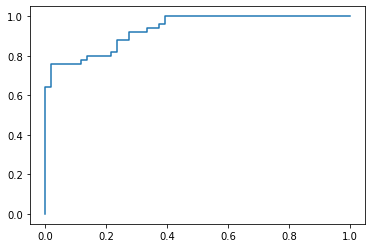

0.9333333333333333


In [8]:
label = [1] * len(ood_car_score) + [0] * len(ind_car_score)
score = np.hstack((ood_car_score, ind_car_score))

fpr, tpr, thresholds = metrics.roc_curve(label, score, pos_label=1)
plt.plot(fpr, tpr)
plt.show()
AUC = auc(fpr, tpr)
print(AUC)

np.save('../GDN_battery/rec_error/average_score_fold%d' % fold_num, score)
np.save('../GDN_battery/rec_error/average_label_fold%d' % fold_num, label)